In [1]:
import numpy as np
import matplotlib.pyplot as plt
import module.banque_ecoulements as bq

In [2]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 10
Ncontours = 100
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

In [3]:
Vinf = 1.5
center = [-0.15,0.2]
Zcenter = center[0] + 1j*center[1]
ZTE = 1.0 + 1j * 0.0
R0 = np.abs(ZTE-Zcenter) 
beta = np.angle(ZTE-Zcenter)
Kappa = 2*np.pi*R0**2*Vinf

In [4]:
def Jouk(z):
    return (z+1/z)

In [5]:
def dJouk(z):
    return (1-1/z**2)

In [6]:
def create_cylinder_flow(grid,Gamma=0.0,center=[0.,0.]):
    unif = bq.uniform(grid,Vinf)
    dipole = bq.dipole(grid,Kappa,center=center)
    tourb = bq.tourbillon(grid,Gamma,R0=R0,center=center)
    ecoul = bq.superpose_ecoulement(unif,dipole,grid)
    ecoul = bq.superpose_ecoulement(ecoul,tourb,grid)
    ecoul['V'] = (ecoul['ur']**2 + ecoul['ut']**2)**0.5
    ecoul['Cp'] = 1 - (ecoul['V']/Vinf)**2
    return ecoul

In [7]:
Gamma = 0.0

In [8]:
grid = bq.create_2Dgrid_cyl(rbounds=[R0-1.0e-5,10*R0],center=center,nr=360,nt=2*360)
Zgrid = grid['x'] + 1j * grid['y']
ecoul = create_cylinder_flow(grid,Gamma=Gamma,center=center)
zgrid = Jouk(Zgrid)
W = ecoul['u'] + 1j * ecoul['v']
w = W/dJouk(Zgrid)
w_prof = np.abs(w)
Cp_prof = 1-(w_prof/Vinf)**2

In [9]:
theta = np.linspace(0,2*np.pi)
cercle = bq.create_2Dgrid_cyl(rbounds=[R0,R0],center=center,nr=1,nt=2*360)
Zcercle = cercle['x'] + 1j * cercle['y']
Prof = Jouk(Zcercle)
LocTE = Jouk(ZTE)
cercle_ecoul = create_cylinder_flow(cercle,Gamma=Gamma,center=center)
W_cercle = cercle_ecoul['u'] + 1j * cercle_ecoul['v']
w_cercle = W_cercle/dJouk(Zcercle)
w_cercle_prof = np.abs(w_cercle)
Cp_cercle_prof = 1-(w_cercle_prof/Vinf)**2

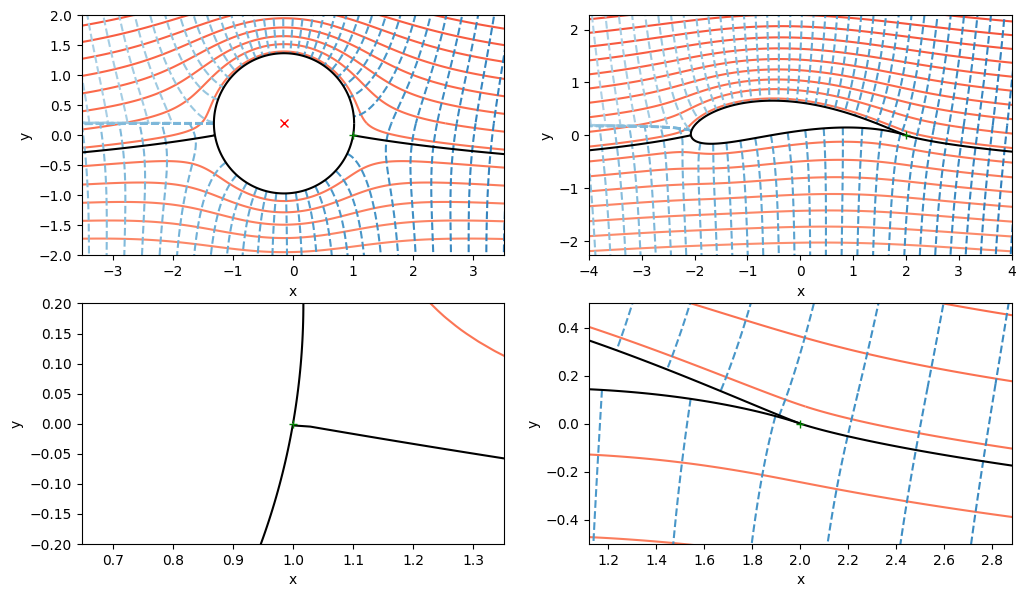

In [10]:
fig,axs = plt.subplots(2,2,figsize=(12,7))
axs[0,0].plot(Zcenter.real,Zcenter.imag,'x',color='red')
axs[0,0].contour(grid['x'],grid['y'],ecoul['psi'],Ncontours,cmap=plt.cm.Reds)
axs[0,0].contour(grid['x'],grid['y'],ecoul['phi'],Ncontours,linestyles='--',cmap=plt.cm.Blues)
axs[0,0].contour(grid['x'],grid['y'],ecoul['psi'],[center[1]*Vinf,],colors='black')
axs[1,0].plot(Zcenter.real,Zcenter.imag,'x',color='red')
axs[1,0].contour(grid['x'],grid['y'],ecoul['psi'],Ncontours,cmap=plt.cm.Reds)
axs[1,0].contour(grid['x'],grid['y'],ecoul['phi'],Ncontours,linestyles='--',cmap=plt.cm.Blues)
axs[1,0].contour(grid['x'],grid['y'],ecoul['psi'],[center[1]*Vinf,],colors='black')

# axs[1].plot([-np.pi,np.pi],[0,0],color='grey')
axs[0,1].contour(zgrid.real,zgrid.imag,ecoul['psi'],Ncontours,cmap=plt.cm.Reds)
axs[0,1].contour(zgrid.real,zgrid.imag,ecoul['phi'],Ncontours,linestyles='--',cmap=plt.cm.Blues)
axs[0,1].contour(zgrid.real,zgrid.imag,ecoul['psi'],[center[1]*Vinf,],colors='black')
axs[1,1].contour(zgrid.real,zgrid.imag,ecoul['psi'],Ncontours,cmap=plt.cm.Reds)
axs[1,1].contour(zgrid.real,zgrid.imag,ecoul['phi'],Ncontours,linestyles='--',cmap=plt.cm.Blues)
axs[1,1].contour(zgrid.real,zgrid.imag,ecoul['psi'],[center[1]*Vinf,],colors='black')

axs[0,0].plot(ZTE.real,ZTE.imag,'+',color='green')
axs[0,1].plot(LocTE.real,LocTE.imag,'+',color='green')
axs[1,0].plot(ZTE.real,ZTE.imag,'+',color='green')
axs[1,1].plot(LocTE.real,LocTE.imag,'+',color='green')

for ax in axs[:,0]:
    ax.axis('equal')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(-2,2)    
    ax.set_ylim(-2,2)
for ax in axs[:,1]:
    ax.axis('equal')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(-4,4)    
    ax.set_ylim(-1,1)
axs[1,0].set_xlim(0.8,1.2)    
axs[1,0].set_ylim(-0.2,0.2)
axs[1,1].set_xlim(1.8,2.2)    
axs[1,1].set_ylim(-0.5,0.5)
plt.show()

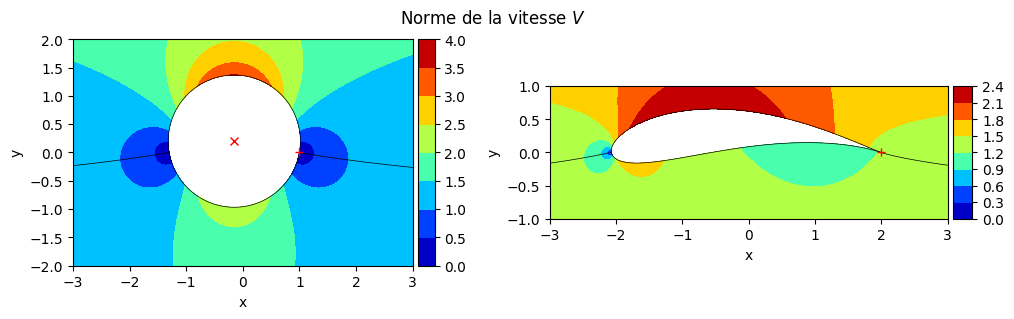

In [11]:
fig,axs = plt.subplots(1,2,figsize=(12,3))
axs[0].plot(Zcenter.real,Zcenter.imag,'x',color='red')
cf = axs[0].contourf(grid['x'],grid['y'],ecoul['V'],cmap=plt.cm.jet)
axs[0].contour(grid['x'],grid['y'],ecoul['psi'],[center[1]*Vinf,],colors='black',linewidths=0.5)
divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(cf, cax=cax)

cf2 = axs[1].contourf(zgrid.real,zgrid.imag,w_prof,linestyles='--',cmap=plt.cm.jet)
axs[1].contour(zgrid.real,zgrid.imag,ecoul['psi'],[center[1]*Vinf,],colors='black',linewidths=0.5)
divider = make_axes_locatable(axs[1])
cax2 = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(cf2, cax=cax2)

axs[0].plot(ZTE.real,ZTE.imag,'+',color='red')
axs[1].plot(LocTE.real,LocTE.imag,'+',color='red')

for ax in axs:
    ax.axis('equal')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(-3,3)
axs[0].set_ylim(-2,2)
axs[1].set_ylim(-1,1)
plt.suptitle(r'Norme de la vitesse $V$')
plt.show()

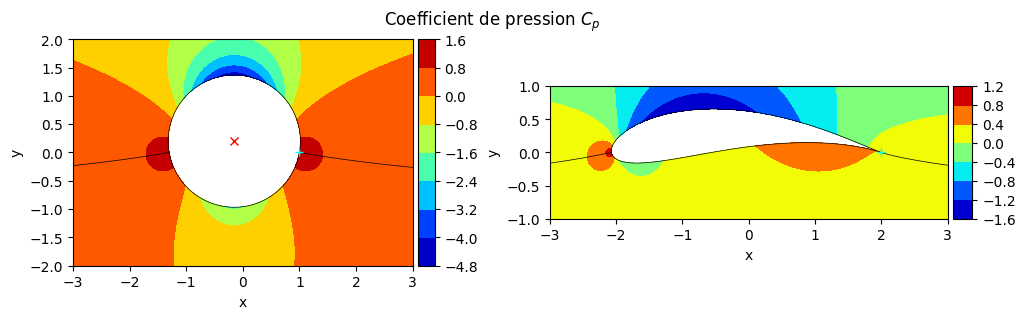

In [12]:
fig,axs = plt.subplots(1,2,figsize=(12,3))
axs[0].plot(Zcenter.real,Zcenter.imag,'x',color='red')
cf = axs[0].contourf(grid['x'],grid['y'],ecoul['Cp'],cmap=plt.cm.jet)
axs[0].contour(grid['x'],grid['y'],ecoul['psi'],[center[1]*Vinf,],colors='black',linewidths=0.5)
divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(cf, cax=cax)

cf2 = axs[1].contourf(zgrid.real,zgrid.imag,Cp_prof,linestyles='--',cmap=plt.cm.jet)
axs[1].contour(zgrid.real,zgrid.imag,ecoul['psi'],[center[1]*Vinf,],colors='black',linewidths=0.5)
divider = make_axes_locatable(axs[1])
cax2 = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(cf2, cax=cax2)

axs[0].plot(ZTE.real,ZTE.imag,'+',color='cyan')
axs[1].plot(LocTE.real,LocTE.imag,'+',color='cyan')

for ax in axs:
    ax.axis('equal')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(-3,3)
axs[0].set_ylim(-2,2)
axs[1].set_ylim(-1,1)
plt.suptitle(r'Coefficient de pression $C_p$')
plt.show()

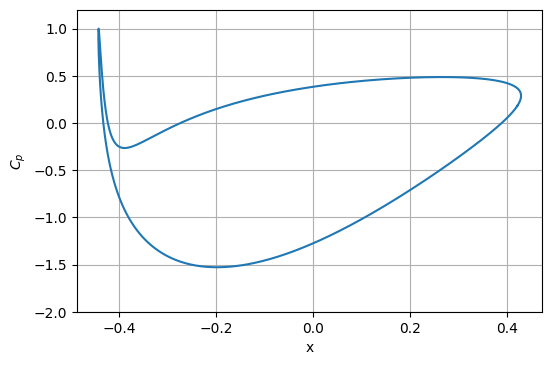

In [21]:
plt.plot(Prof.real/(4*R0),Cp_cercle_prof)
plt.ylim(-2.0,1.2)
plt.xlabel(r'x')
plt.ylabel(r'$C_p$')
plt.grid()
plt.show()